<a href="https://colab.research.google.com/github/amit1995boop/Financial-risk-management/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all required packages

In [7]:
# Install Required Libs

# Parameter searching library (BayesSearchCV)
!pip install scikit-optimize

# XGBoost
!pip install xgboost

# Light GBM
!pip install lightgbm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.7 MB/s eta 0:00:00


In [8]:
# Import all required libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import all required from scikit-learn
# Pre processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

# Estimators
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# Model Search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve

#  Other Model Search Libs
from skopt import BayesSearchCV # Base lib name is scikit-optimize

# Model Report Card
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

# Make sample data using scikit learn
from sklearn.datasets import make_blobs

# Others on top of Scikit Learn
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier.rocauc import roc_auc

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


# Data import and explorartory analysis

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Loan_Prediction.ipynb to Loan_Prediction.ipynb


In [9]:
# Import data
train_df = pd.read_csv("loans_2007_v1.csv")

In [ ]:
# Show top 5 rows of the data (5 is by default)
train_df.head()

,Unnamed: 0,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,home_ownership,verification_status,purpose,term
0,0,5000.0,10.65,162.87,10,24000.0,1,860,27.65,0.0,...,3.0,0.0,13648.0,83.7,9.0,744.0,RENT,Verified,credit_card,36 months
1,1,2500.0,15.27,59.83,0,30000.0,0,309,1.00,0.0,...,3.0,0.0,1687.0,9.4,4.0,499.0,RENT,Source Verified,car,60 months
2,2,2400.0,15.96,84.33,10,12252.0,1,606,8.72,0.0,...,2.0,0.0,2956.0,98.5,10.0,719.0,RENT,Not Verified,small_business,36 months
3,3,10000.0,13.49,339.31,10,49200.0,1,917,20.00,0.0,...,10.0,0.0,5598.0,21.0,37.0,604.0,RENT,Source Verified,other,36 months
4,4,5000.0,7.90,156.46,3,36000.0,1,852,11.20,0.0,...,9.0,0.0,7963.0,28.3,12.0,679.0,RENT,Source Verified,wedding,36 months


In [ ]:
# No of rows and columns
train_df.shape

(39252, 22)

In [ ]:
# No of elements
train_df.size

863544

In [ ]:
# Column names
print(f'No of columns = {train_df.shape[1]}', '\n')
train_df.columns.tolist()

No of columns = 22 



['Unnamed: 0',
 'loan_amnt',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'loan_status',
 'zip_code',
 'dti',
 'delinq_2yrs',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'last_fico_range_high',
 'home_ownership',
 'verification_status',
 'purpose',
 'term']

In [ ]:
# Any dupicate records
train_df.duplicated().sum()

0

In [ ]:
# Any misisng values in column
train_df.isnull().sum()

Unnamed: 0               0
loan_amnt                0
int_rate                 0
installment              0
emp_length               0
annual_inc               0
loan_status              0
zip_code                 0
dti                      0
delinq_2yrs              0
fico_range_high          0
inq_last_6mths           0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util              50
total_acc                0
last_fico_range_high     0
home_ownership           0
verification_status      0
purpose                  0
term                     0
dtype: int64

In [ ]:
# Any misisng values in column (isna is same sas isnull)
train_df.isna().sum()

Unnamed: 0               0
loan_amnt                0
int_rate                 0
installment              0
emp_length               0
annual_inc               0
loan_status              0
zip_code                 0
dti                      0
delinq_2yrs              0
fico_range_high          0
inq_last_6mths           0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util              50
total_acc                0
last_fico_range_high     0
home_ownership           0
verification_status      0
purpose                  0
term                     0
dtype: int64

In [ ]:
# Remove or Impute nan values
train_df = train_df.dropna(subset=['revol_util'])

In [ ]:
# Any misisng values in column (isna is same sas isnull)
train_df.isna().sum()

Unnamed: 0              0
loan_amnt               0
int_rate                0
installment             0
emp_length              0
annual_inc              0
loan_status             0
zip_code                0
dti                     0
delinq_2yrs             0
fico_range_high         0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
last_fico_range_high    0
home_ownership          0
verification_status     0
purpose                 0
term                    0
dtype: int64

In [ ]:
# Unique values
train_df.nunique()

Unnamed: 0              39202
loan_amnt                 875
int_rate                  371
installment             15224
emp_length                 11
annual_inc               5278
loan_status                 2
zip_code                  822
dti                      2860
delinq_2yrs                11
fico_range_high            36
inq_last_6mths              9
open_acc                   40
pub_rec                     5
revol_bal               21523
revol_util               1089
total_acc                  82
last_fico_range_high       72
home_ownership              5
verification_status         3
purpose                    14
term                        2
dtype: int64

In [ ]:
# Unique values in %
round((train_df.nunique() / train_df.count()), 4) * 100

Unnamed: 0              100.00
loan_amnt                 2.23
int_rate                  0.95
installment              38.83
emp_length                0.03
annual_inc               13.46
loan_status               0.01
zip_code                  2.10
dti                       7.30
delinq_2yrs               0.03
fico_range_high           0.09
inq_last_6mths            0.02
open_acc                  0.10
pub_rec                   0.01
revol_bal                54.90
revol_util                2.78
total_acc                 0.21
last_fico_range_high      0.18
home_ownership            0.01
verification_status       0.01
purpose                   0.04
term                      0.01
dtype: float64

In [ ]:
# Describe the entire train data frame (it will only describe the numerical columns only)
train_df.describe()

,Unnamed: 0,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high
count,39202.000000,39202.000000,39202.000000,39202.000000,39202.000000,3.920200e+04,39202.000000,39202.000000,39202.000000,39202.000000,39202.000000,39202.000000,39202.000000,39202.000000,39202.000000,39202.000000,39202.000000,39202.000000
mean,19614.267971,11145.393092,11.978145,323.521056,4.828606,6.891996e+04,0.855875,502.355033,13.298647,0.146600,719.015560,0.870338,9.292919,0.055431,13345.554513,48.741092,22.089409,691.873705
std,11328.634599,7400.190394,3.707822,208.481659,3.603876,6.399017e+04,0.351221,329.761046,6.675006,0.491464,35.874179,1.071057,4.401049,0.238110,15877.087877,28.350143,11.409392,79.542947
min,0.000000,500.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,7.000000,0.000000,0.000000,629.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,9803.250000,5425.000000,8.940000,166.500000,2.000000,4.020600e+04,1.000000,200.000000,8.160000,0.000000,689.000000,0.000000,6.000000,0.000000,3688.000000,25.300000,13.000000,649.000000
50%,19609.500000,10000.000000,11.830000,279.160000,4.000000,5.900000e+04,1.000000,448.000000,13.390000,0.000000,714.000000,1.000000,9.000000,0.000000,8815.500000,49.100000,20.000000,704.000000
75%,29424.750000,15000.000000,14.460000,427.977500,9.000000,8.200000e+04,1.000000,852.000000,18.580000,0.000000,744.000000,1.000000,12.000000,0.000000,17003.000000,72.300000,29.000000,749.000000
max,39251.000000,35000.000000,24.590000,1305.190000,10.000000,6.000000e+06,1.000000,999.000000,29.990000,11.000000,829.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,850.000000


In [ ]:
# Another quick way to get information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39202 entries, 0 to 39251
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            39202 non-null  int64  
 1   loan_amnt             39202 non-null  float64
 2   int_rate              39202 non-null  float64
 3   installment           39202 non-null  float64
 4   emp_length            39202 non-null  int64  
 5   annual_inc            39202 non-null  float64
 6   loan_status           39202 non-null  int64  
 7   zip_code              39202 non-null  int64  
 8   dti                   39202 non-null  float64
 9   delinq_2yrs           39202 non-null  float64
 10  fico_range_high       39202 non-null  float64
 11  inq_last_6mths        39202 non-null  float64
 12  open_acc              39202 non-null  float64
 13  pub_rec               39202 non-null  float64
 14  revol_bal             39202 non-null  float64
 15  revol_util         

In [ ]:
# We can also inspect data types in this way
train_df.dtypes

Unnamed: 0                int64
loan_amnt               float64
int_rate                float64
installment             float64
emp_length                int64
annual_inc              float64
loan_status               int64
zip_code                  int64
dti                     float64
delinq_2yrs             float64
fico_range_high         float64
inq_last_6mths          float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
last_fico_range_high    float64
home_ownership           object
verification_status      object
purpose                  object
term                     object
dtype: object

- We can also remove 2 post event (our case event is loan_status) variables {loan_amount} & {installment}

In [ ]:
#remove these columns
train_df2 = train_df.drop(columns=['Unnamed: 0', 'loan_amnt', 'installment'])
train_df2.head()

,int_rate,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,home_ownership,verification_status,purpose,term
0,10.65,10,24000.0,1,860,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,744.0,RENT,Verified,credit_card,36 months
1,15.27,0,30000.0,0,309,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,499.0,RENT,Source Verified,car,60 months
2,15.96,10,12252.0,1,606,8.72,0.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,719.0,RENT,Not Verified,small_business,36 months
3,13.49,10,49200.0,1,917,20.00,0.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,604.0,RENT,Source Verified,other,36 months
4,7.90,3,36000.0,1,852,11.20,0.0,734.0,3.0,9.0,0.0,7963.0,28.3,12.0,679.0,RENT,Source Verified,wedding,36 months


In [ ]:
# Make category of columns, mentioned two types of variables below seperately.

# Numerical variables ( can be continous (can take any numerical value) or discreet (can only take whole numbers as values) )
numerical_column = ['int_rate', 'emp_length', 'annual_inc', 'zip_code', 'dti', 'delinq_2yrs', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_fico_range_high']

# Categorical - ( can be nominal (no order categories) or ordinal (ordered categories) )
categorical_column = ['home_ownership', 'verification_status', 'purpose', 'term']

# date_time_column =
# mixed_type_column =

target_column = ['loan_status']

In [ ]:
# Loan_status class distribution
round(train_df2[target_column].value_counts()/train_df.shape[0], 4)*100

loan_status
1              85.59
0              14.41
dtype: float64

0 - Rejected\
1 - Not Rejected

In [ ]:
# Function to get the details of numerical_column

def numerical_column_details(data_frame: pd.DataFrame, column_names: list) -> None:
    for col in column_names:
      # Print details
      print(f'Column name = {col}\n\
      Number of unique values = {data_frame[col].nunique()}\n\
      First_10_Sample_Values = {data_frame[col].unique()[:10]}\n\
      Min value = {min(data_frame[col])}\n\
      Max value = {min(data_frame[col])}\n\
      Range = {max(data_frame[col]) - min(data_frame[col])}\n\
      Mean = {data_frame[col].mean()}\n\
      Median = {data_frame[col].median()}\n\
      Mode = {data_frame[col].mode()}\n\
      Variance = {data_frame[col].var()}\n\
      Std Dev = {data_frame[col].std()}', '\n')
      # Plot Histogram
      fig = data_frame[col].hist(bins=50)
      fig.set_title(col + '_Histogram')
      fig.set_xlabel(col)
      fig.set_ylabel('Number of Records')
      plt.show()

Column name = int_rate
      Number of unique values = 371
      First_10_Sample_Values = [10.65 15.27 15.96 13.49  7.9  18.64 21.28 12.69 14.65  9.91]
      Min value = 5.42
      Max value = 5.42
      Range = 19.17
      Mean = 11.978144992602418
      Median = 11.83
      Mode = 0    10.99
Name: int_rate, dtype: float64
      Variance = 13.747942070453865
      Std Dev = 3.7078217420008026 



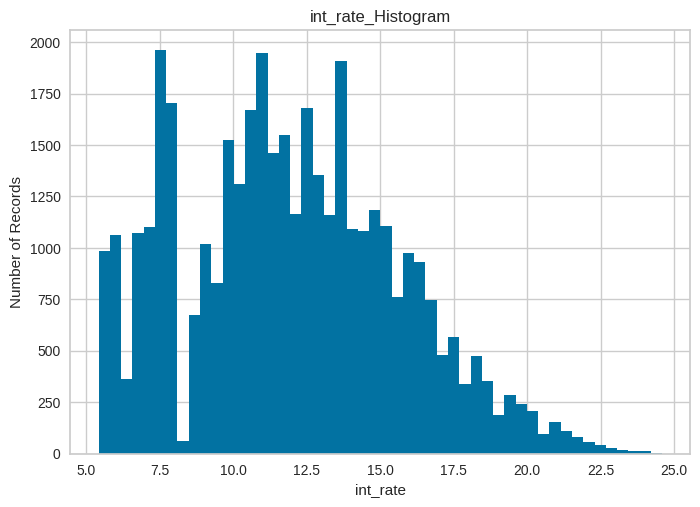

Column name = emp_length
      Number of unique values = 11
      First_10_Sample_Values = [10  0  3  8  9  4  5  1  6  2]
      Min value = 0
      Max value = 0
      Range = 10
      Mean = 4.8286056833835005
      Median = 4.0
      Mode = 0    10
Name: emp_length, dtype: int64
      Variance = 12.98791871601882
      Std Dev = 3.6038755133909413 



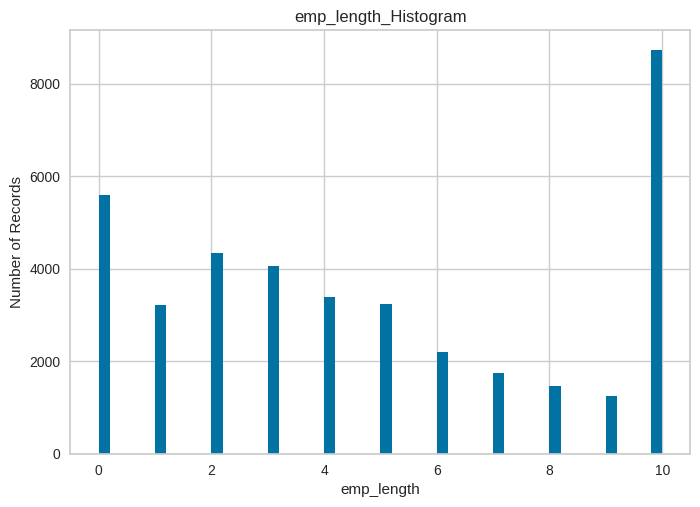

Column name = annual_inc
      Number of unique values = 5278
      First_10_Sample_Values = [24000. 30000. 12252. 49200. 36000. 47004. 48000. 40000. 15000. 72000.]
      Min value = 4000.0
      Max value = 4000.0
      Range = 5996000.0
      Mean = 68919.95678383757
      Median = 59000.0
      Mode = 0    60000.0
Name: annual_inc, dtype: float64
      Variance = 4094741923.715268
      Std Dev = 63990.17052419276 



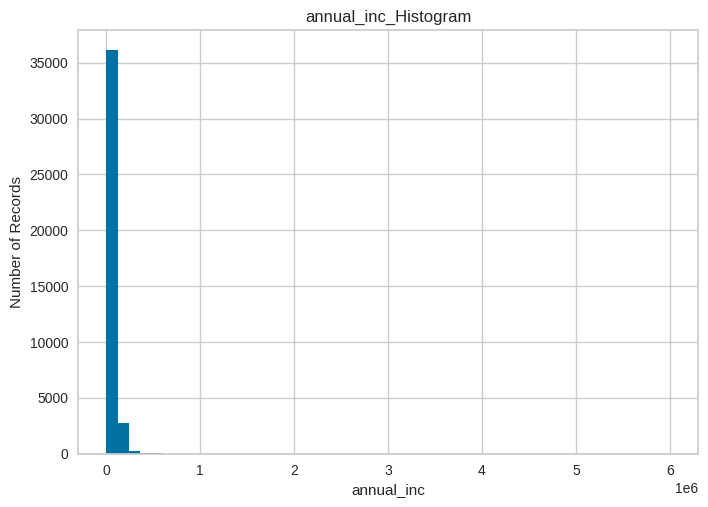

Column name = zip_code
      Number of unique values = 822
      First_10_Sample_Values = [860 309 606 917 852 280 900 958 774 853]
      Min value = 7
      Max value = 7
      Range = 992
      Mean = 502.3550329064844
      Median = 448.0
      Mode = 0    100
Name: zip_code, dtype: int64
      Variance = 108742.34735471052
      Std Dev = 329.76104584184975 



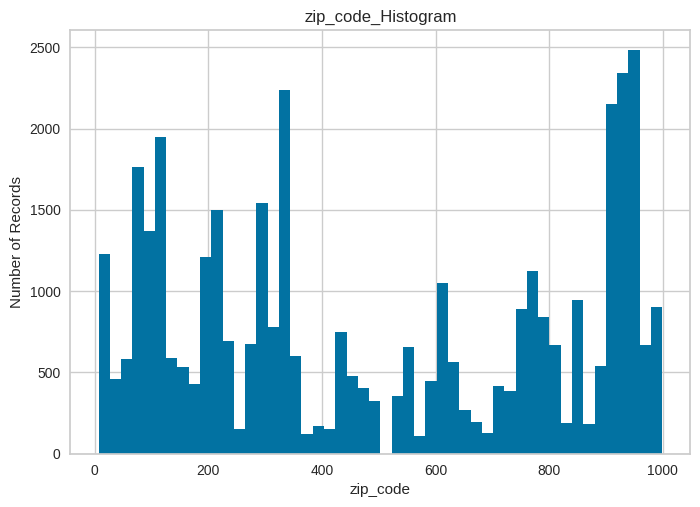

Column name = dti
      Number of unique values = 2860
      First_10_Sample_Values = [27.65  1.    8.72 20.   11.2  23.51  5.35  5.55 18.08 16.12]
      Min value = 0.0
      Max value = 0.0
      Range = 29.99
      Mean = 13.298647262894749
      Median = 13.39
      Mode = 0    0.0
Name: dti, dtype: float64
      Variance = 44.55570894018906
      Std Dev = 6.67500628765165 



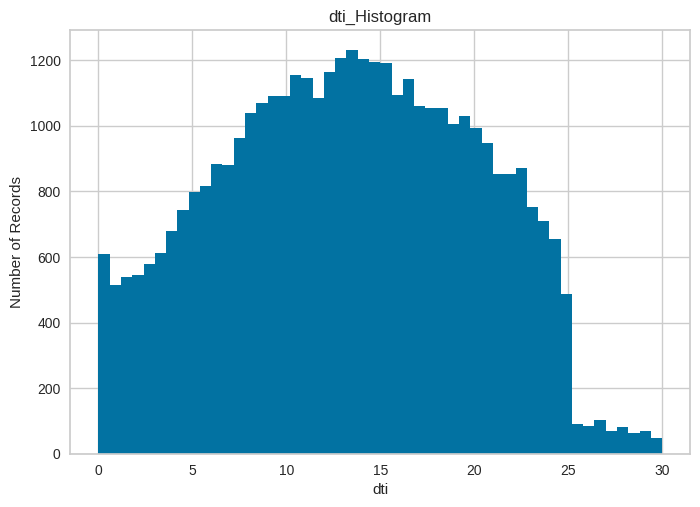

Column name = delinq_2yrs
      Number of unique values = 11
      First_10_Sample_Values = [0. 2. 3. 1. 4. 6. 5. 8. 7. 9.]
      Min value = 0.0
      Max value = 0.0
      Range = 11.0
      Mean = 0.14659966328248558
      Median = 0.0
      Mode = 0    0.0
Name: delinq_2yrs, dtype: float64
      Variance = 0.24153699485001798
      Std Dev = 0.49146413383889775 



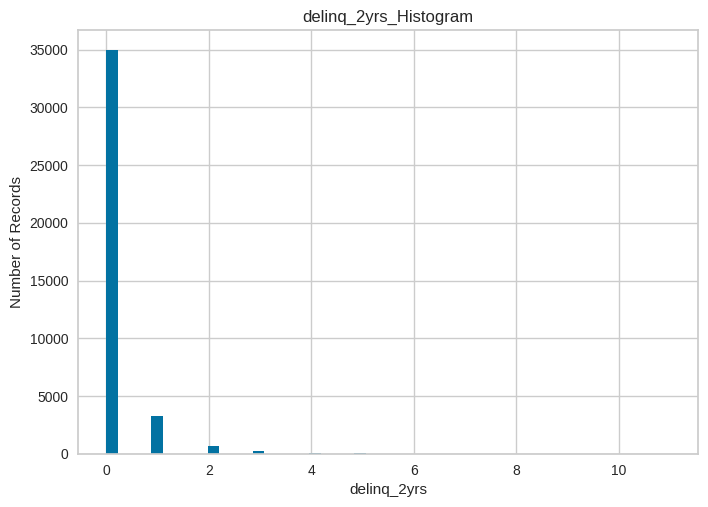

Column name = fico_range_high
      Number of unique values = 36
      First_10_Sample_Values = [739. 744. 694. 734. 664. 679. 729. 699. 714. 709.]
      Min value = 629.0
      Max value = 629.0
      Range = 200.0
      Mean = 719.0155604305903
      Median = 714.0
      Mode = 0    704.0
Name: fico_range_high, dtype: float64
      Variance = 1286.9567232503596
      Std Dev = 35.8741790602985 



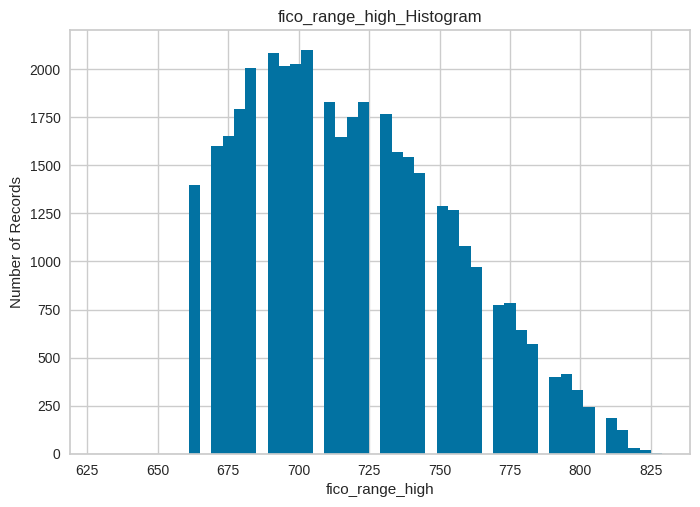

Column name = inq_last_6mths
      Number of unique values = 9
      First_10_Sample_Values = [1. 5. 2. 3. 0. 4. 6. 7. 8.]
      Min value = 0.0
      Max value = 0.0
      Range = 8.0
      Mean = 0.870338248048569
      Median = 1.0
      Mode = 0    0.0
Name: inq_last_6mths, dtype: float64
      Variance = 1.1471628100005322
      Std Dev = 1.0710568659042021 



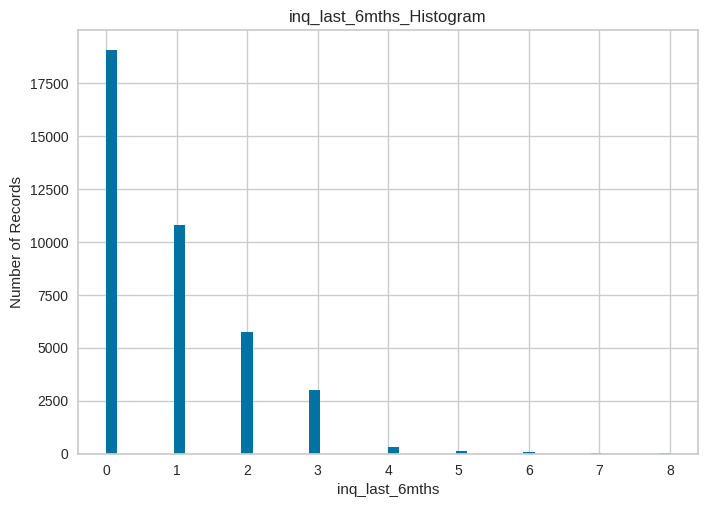

Column name = open_acc
      Number of unique values = 40
      First_10_Sample_Values = [ 3.  2. 10.  9.  7.  4. 11. 14. 12. 20.]
      Min value = 2.0
      Max value = 2.0
      Range = 42.0
      Mean = 9.292918728636295
      Median = 9.0
      Mode = 0    7.0
Name: open_acc, dtype: float64
      Variance = 19.36923584191907
      Std Dev = 4.401049402349293 



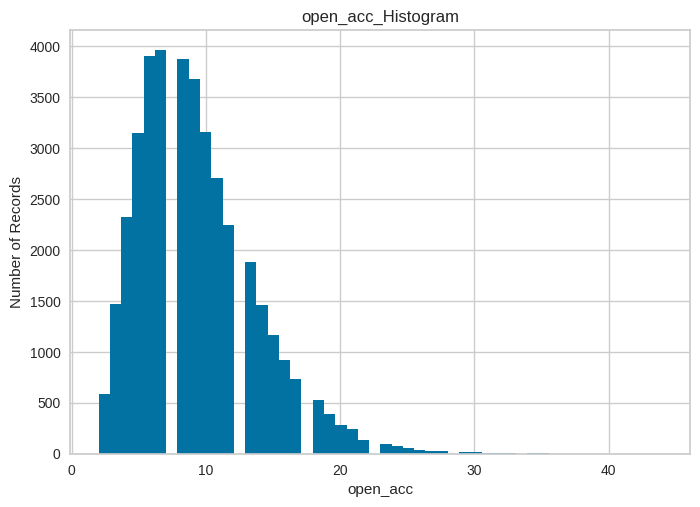

Column name = pub_rec
      Number of unique values = 5
      First_10_Sample_Values = [0. 1. 2. 3. 4.]
      Min value = 0.0
      Max value = 0.0
      Range = 4.0
      Mean = 0.0554308453650324
      Median = 0.0
      Mode = 0    0.0
Name: pub_rec, dtype: float64
      Variance = 0.056696226448860604
      Std Dev = 0.23810969415137345 



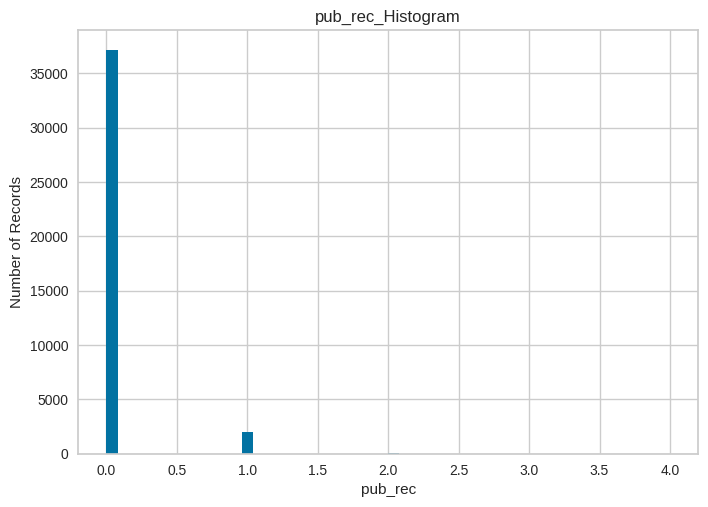

Column name = revol_bal
      Number of unique values = 21523
      First_10_Sample_Values = [13648.  1687.  2956.  5598.  7963. 17726.  8221.  5210.  9279.  4032.]
      Min value = 0.0
      Max value = 0.0
      Range = 149588.0
      Mean = 13345.554512524872
      Median = 8815.5
      Mode = 0    0.0
Name: revol_bal, dtype: float64
      Variance = 252081919.46889126
      Std Dev = 15877.087877469572 



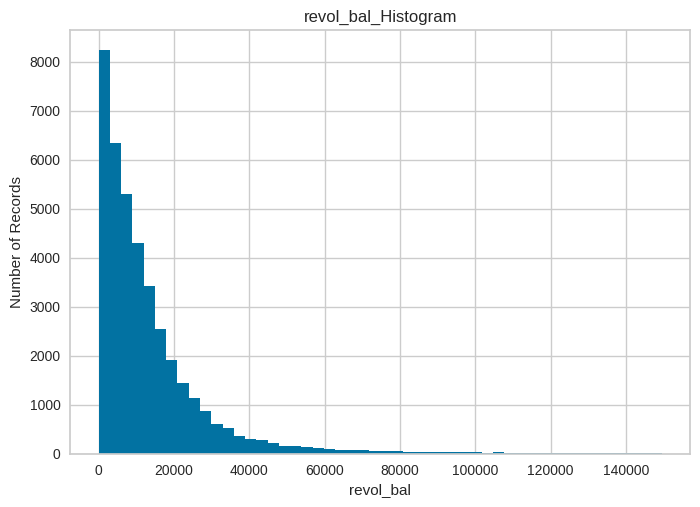

Column name = revol_util
      Number of unique values = 1089
      First_10_Sample_Values = [83.7  9.4 98.5 21.  28.3 85.6 87.5 32.6 36.5 20.6]
      Min value = 0.0
      Max value = 0.0
      Range = 99.9
      Mean = 48.741092036120605
      Median = 49.1
      Mode = 0    0.0
Name: revol_util, dtype: float64
      Variance = 803.730609238283
      Std Dev = 28.350143019714785 



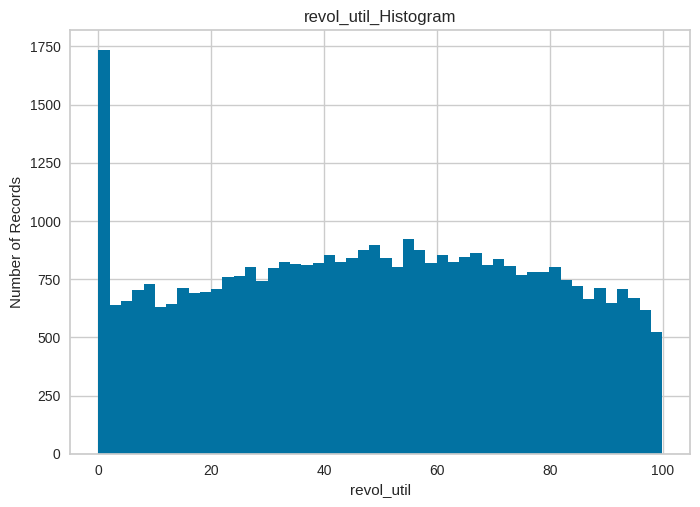

Column name = total_acc
      Number of unique values = 82
      First_10_Sample_Values = [ 9.  4. 10. 37. 12. 11. 13.  3. 23. 34.]
      Min value = 2.0
      Max value = 2.0
      Range = 88.0
      Mean = 22.08940870363757
      Median = 20.0
      Mode = 0    16.0
Name: total_acc, dtype: float64
      Variance = 130.17422061921252
      Std Dev = 11.409391772536015 



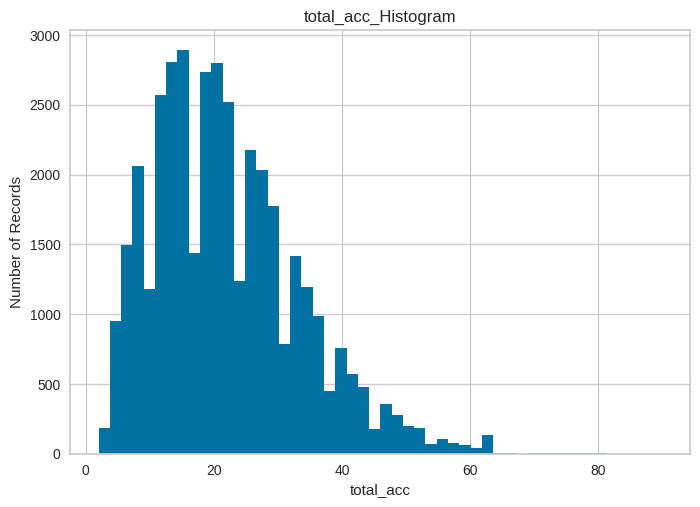

Column name = last_fico_range_high
      Number of unique values = 72
      First_10_Sample_Values = [744. 499. 719. 604. 679. 654. 689. 519. 734. 669.]
      Min value = 0.0
      Max value = 0.0
      Range = 850.0
      Mean = 691.8737054231927
      Median = 704.0
      Mode = 0    709.0
Name: last_fico_range_high, dtype: float64
      Variance = 6327.080373346349
      Std Dev = 79.54294672280093 



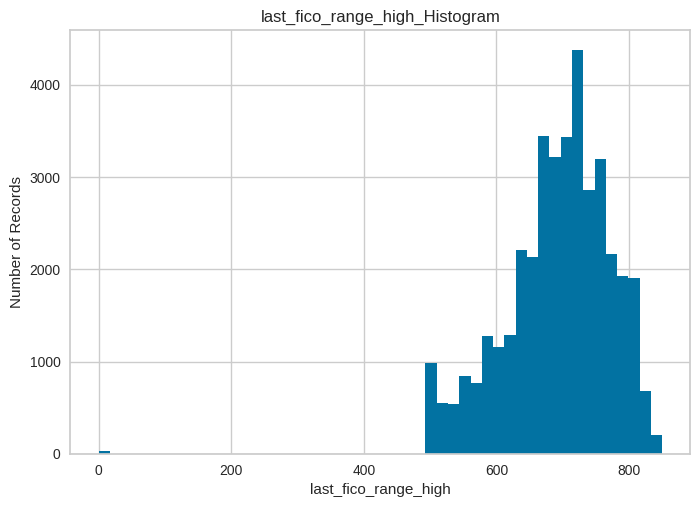

In [ ]:
numerical_column_details(data_frame = train_df2, column_names = numerical_column)

In [ ]:
# Function to get the details of categorical_column

def categorical_column_details(data_frame: pd.DataFrame, column_names: list) -> None:
    for col in column_names:
      # Print details
      print(f'Column name = {col}\nNumber of unique values = {data_frame[col].nunique()}\nFirst_50_Sample_Values = {data_frame[col].unique()[:50]}', '\n')
      # Plot Histogram
      fig = data_frame[col].value_counts().plot.bar()
      fig.set_title(col + '_BarChart')
      fig.set_ylabel('Number of Records')
      plt.show()

Column name = home_ownership
Number of unique values = 5
First_50_Sample_Values = ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE'] 



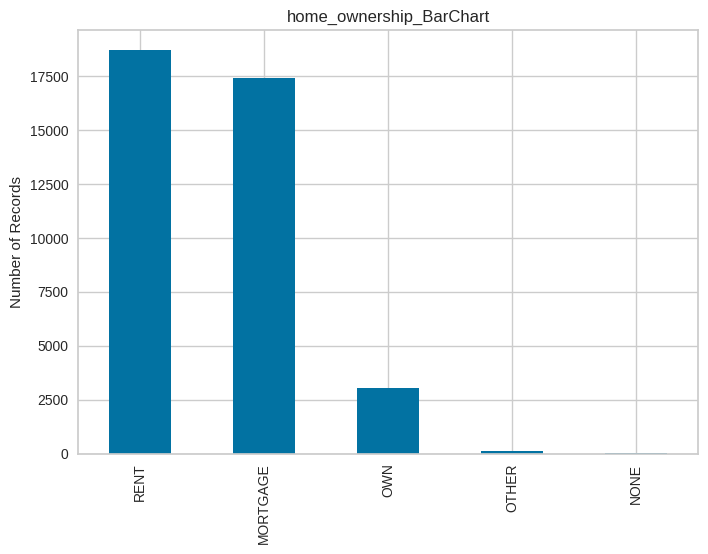

Column name = verification_status
Number of unique values = 3
First_50_Sample_Values = ['Verified' 'Source Verified' 'Not Verified'] 



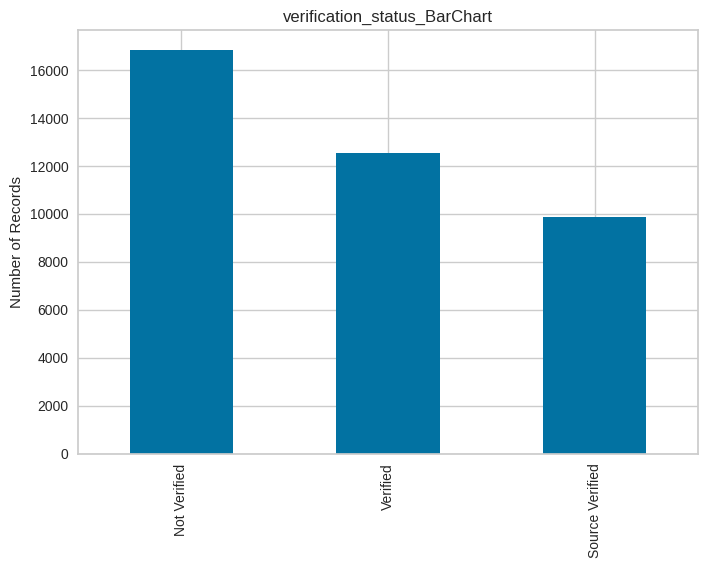

Column name = purpose
Number of unique values = 14
First_50_Sample_Values = ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational'] 



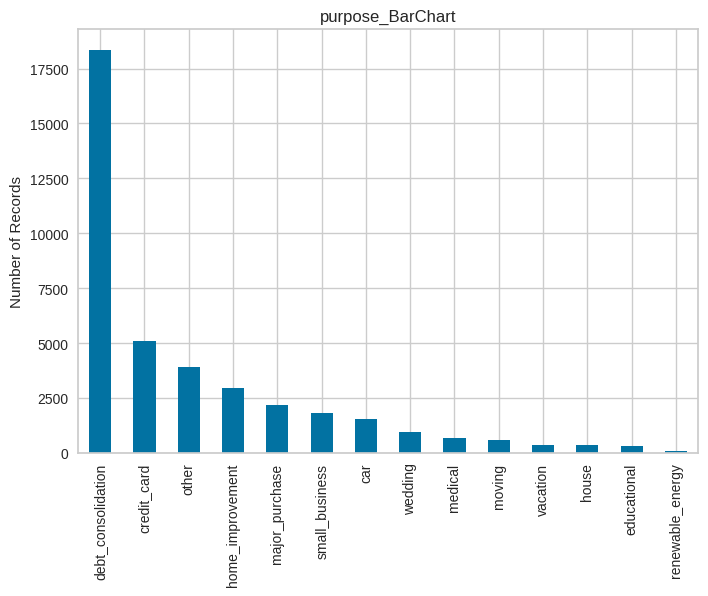

Column name = term
Number of unique values = 2
First_50_Sample_Values = ['36 months' '60 months'] 



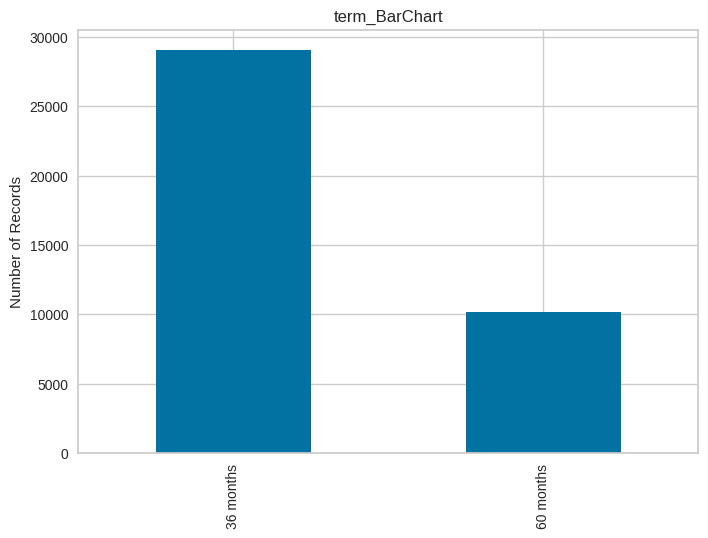

In [ ]:
categorical_column_details(data_frame = train_df2, column_names = categorical_column)

# Data modeling

## Steps to keep in mind

**Now we know more about data lets do the following setps to come up with a baseline model**

1. Split the data into feature set and outcome/target variable. Keeping in mind that X is a feature matrix (2-d) and y is an array (1-d)
2. Split the data into Train and Test set
3. Apply data transformation on numerical values (Standard scaling or normalization)
4. Apply data transformation on nominal values (One hot encoding or categorical encoding or dummy variables)
5. Apply an estimator (Logistics regression or SVM etc.) to learn from the train data.
6. Predict on the validation/test set for results.
7. Check the performace difference between train and validation & teh final test set
8. Do the same for other methods with train_df2 complete

In [ ]:
# Split into feature set "X" and target variable "y"
X = train_df2.drop(columns=target_column)
y = train_df2[target_column]

print(f"Shape of X: {X.shape}\nShape of y: {y.shape}")

Shape of X: (39202, 18)
Shape of y: (39202, 1)


In [ ]:
# Re check X
X.head()

,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,home_ownership,verification_status,purpose,term
0,10.65,10,24000.0,860,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,744.0,RENT,Verified,credit_card,36 months
1,15.27,0,30000.0,309,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,499.0,RENT,Source Verified,car,60 months
2,15.96,10,12252.0,606,8.72,0.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,719.0,RENT,Not Verified,small_business,36 months
3,13.49,10,49200.0,917,20.00,0.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,604.0,RENT,Source Verified,other,36 months
4,7.90,3,36000.0,852,11.20,0.0,734.0,3.0,9.0,0.0,7963.0,28.3,12.0,679.0,RENT,Source Verified,wedding,36 months


In [ ]:
y.head()

,loan_status
0,1
1,0
2,1
3,1
4,1


In [ ]:
# Split data into train and test (Validation in our case)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.20)

print(f"Shape of Xtrain: {X_train.shape}\n\
Shape of Xtest: {X_test.shape}\n\
Shape of ytrain: {y_train.shape}\n\
Shape of ytest: {y_test.shape}")

Shape of Xtrain: (31361, 18)
Shape of Xtest: (7841, 18)
Shape of ytrain: (31361, 1)
Shape of ytest: (7841, 1)


In [ ]:
# Here our X is in correct 2-d shape as a matrix
# Convert y to 1-d array

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
X_train.head(3)

,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,home_ownership,verification_status,purpose,term
22581,18.17,3,50000.0,120,21.53,0.0,664.0,0.0,11.0,0.0,9572.0,70.4,17.0,574.0,MORTGAGE,Not Verified,debt_consolidation,60 months
30961,12.73,3,60000.0,320,21.44,0.0,679.0,0.0,12.0,0.0,20564.0,80.6,28.0,764.0,MORTGAGE,Not Verified,debt_consolidation,36 months
4138,6.03,10,110000.0,17,9.47,0.0,804.0,2.0,6.0,0.0,2498.0,16.7,23.0,809.0,MORTGAGE,Verified,debt_consolidation,36 months


In [ ]:
X_test.head(3)

,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,home_ownership,verification_status,purpose,term
21797,12.98,9,115000.0,242,23.35,0.0,704.0,2.0,14.0,0.0,23057.0,60.1,55.0,714.0,MORTGAGE,Verified,credit_card,60 months
6543,7.51,10,54080.0,89,4.15,0.0,744.0,0.0,8.0,1.0,941.0,2.0,21.0,744.0,OWN,Not Verified,debt_consolidation,36 months
5626,6.03,10,42000.0,959,14.26,0.0,774.0,3.0,13.0,0.0,2993.0,8.1,39.0,819.0,MORTGAGE,Not Verified,debt_consolidation,36 months


In [ ]:
# Data transformation

#You do not need to standardize your data for tree-based models,
#such as decision trees or random forests. These models are not
#sensitive to the scale of the input features because they make
#splits based on individual features and their thresholds.

# StandardScaler will make some vales to be passed in X as negative in range so it will not be accepted by Naive bayes
ct = ColumnTransformer(transformers=[('standardscaler', StandardScaler(), numerical_column),
                                ('onehotencoder', OneHotEncoder(), categorical_column)])

# Apply on Train features
ct.fit(X_train) # Learn the stats for this data set
X_train = ct.transform(X_train) # Apply Transformations

# Second way in one line
# ct.fit_transform(Xtrain)

# Apply on Test Features (Make sure you dont use Fit this time)
# You will apply the same stats for transfromation over test set which you have have learned over the training set.

X_test = ct.transform(X_test)

# Check
print(f"Shape of X_train: {X_train.shape}\n\
Shape of X_test: {X_test.shape}\n\
Shape of y_train: {y_train.shape}\n\
Shape of y_test: {y_test.shape}")

Shape of X_train: (31361, 38)
Shape of X_test: (7841, 38)
Shape of y_train: (31361,)
Shape of y_test: (7841,)


- We can also check for Dummy variable trap.
- Pass `sparse=False, drop="first" to OneHotEnconder()

In [ ]:
X_train

array([[ 1.66308245, -0.50718423, -0.32414549, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.19745599, -0.50718423, -0.15112846, ...,  0.        ,
         1.        ,  0.        ],
       [-1.60763542,  1.43511973,  0.7139567 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 2.99938893, -0.50718423, -0.11896459, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.40221263,  0.60270375, -0.54560729, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.42376596,  0.60270375, -0.15112846, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
X_train.data

In [ ]:
X_test

array([[ 0.26481015,  1.15764774,  0.80046521, ...,  0.        ,
         0.        ,  1.        ],
       [-1.20889881,  1.43511973, -0.25355454, ...,  0.        ,
         1.        ,  0.        ],
       [-1.60763542,  1.43511973, -0.46255912, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.60763542, -0.22971223, -0.47986082, ...,  0.        ,
         1.        ,  0.        ],
       [-0.23630478, -0.78465622, -0.15112846, ...,  0.        ,
         1.        ,  0.        ],
       [-0.33598894,  0.60270375, -0.58360183, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
# Create a new DataFrame to store the results
classification_results = pd.DataFrame(columns=['classifier_Name', 'Accuracy_Score'])
#now dataset is ready to feed into the model

# Dtrees

### Basic Theory

Scikit-Learn `DecisionTreeClassifier()` uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e., questions only
have yes/no answers). However, other algorithms such as ID3 can
produce Decision Trees with nodes that have more than two children.

The CART (Classification and Regression Trees) algorithm is a decision tree algorithm commonly used for both classification and regression tasks. It was developed by Leo Breiman, Jerome Friedman, Richard Olshen, and Charles Stone in the 1980s.


The CART algorithm builds a binary decision tree by recursively partitioning the feature space based on a selected feature and a threshold value. The goal is to find the optimal splits that maximize the homogeneity of the target variable within each partition. The algorithm uses a measure such as Gini impurity (for classification) or mean squared error (for regression) to evaluate the quality of a split.


Here's a high-level overview of how the CART algorithm works:



* Start with the entire dataset and select a feature to split on.

* Determine the threshold value for the selected feature that minimizes impurity or error.

* Split the dataset into two subsets based on the chosen feature and threshold value.

* Recursively repeat steps 1-3 for each subset, considering different features and thresholds at each node.

* Stop the recursive process when a stopping criterion is met, such as reaching a maximum tree depth or a minimum number of samples per leaf.

* Assign a class label (for classification) or a predicted value (for regression) to each leaf node based on the majority class or average value of the samples in that node.


The resulting decision tree can be used for predicting the target variable of new instances by traversing the tree from the root to a leaf node, following the appropriate branches based on the feature values of the instance.


The CART algorithm has been widely used in various domains due to its simplicity, interpretability, and ability to handle both categorical and numerical features. It is a foundational algorithm that has inspired many variations and improvements in the field of decision trees and ensemble methods, such as random forests and gradient boosting.

### Tuning the DTree

**Note**

- One of the many qualities of Decision Trees is that they require
very little data preparation. In particular, they don’t require feature
scaling or centering at all.


In [ ]:
# Dtree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
# Make sure you pass the values in same order. First ytest (Orginal values) and then predictions
accuracy_score(y_test, predictions)
classification_results = classification_results.append({'classifier_Name': 'Dtree', 'Accuracy_Score': accuracy_score(y_test, predictions)}, ignore_index=True)
classification_results

<ipython-input-112-7d02f18aaf9c>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_results = classification_results.append({'classifier_Name': 'Dtree', 'Accuracy_Score': accuracy_score(y_test, predictions)}, ignore_index=True)


,classifier_Name,Accuracy_Score
0,Dtree,0.837393


Text(168.97222222222223, 0.5, 'Predicted Label')

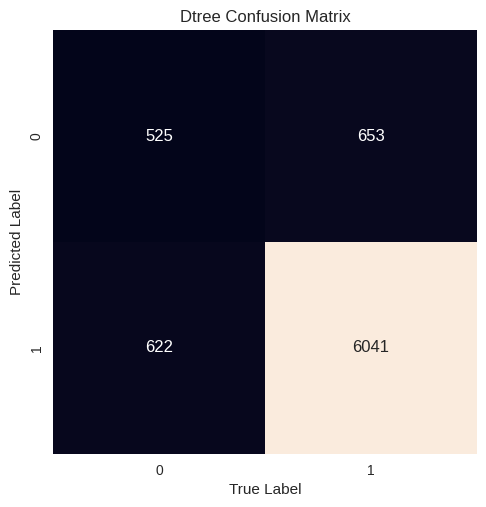

In [ ]:
# Plot Confusion Matrix
# Format is -> confusion_matrix(Actual, Predicted)
c_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(c_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Dtree Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [ ]:
# Using cross validation

cv_scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5)

# Append results to classification results data frame
classification_results = classification_results.append({'classifier_Name': 'CV DTree', 'Accuracy_Score': round(cv_scores.mean(), 4)*100}, ignore_index=True)
classification_results

print(f'\nList of CV models created and validated -> {cv_scores}')
print(f'Mean of CV models -> {round(cv_scores.mean(), 4)*100}', '\n')


List of CV models created and validated -> [0.8401084  0.84311224 0.84646046 0.83816964 0.83657526]
Mean of CV models -> 84.09 



<ipython-input-114-c37898a93db9>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_results = classification_results.append({'classifier_Name': 'CV DTree', 'Accuracy_Score': round(cv_scores.mean(), 4)*100}, ignore_index=True)


#### Lets look at the available parameters, attributes & methods

**Regularization Hyperparameters**

- Decision Trees make very few assumptions about the training data (as opposed to linear models, which obviously assume that the data is linear, for example).
- If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely, and most likely overfitting it. Such a model is often called a nonparametric model, not because it does not have any parameters (it often has a lot) but because the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data.

- In contrast, a parametric model such as a linear model has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).

- To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training. As you know by now, this is called regularization.

- The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the Decision Tree.

- In Scikit-Learn, this is controlled by the max_depth hyperparameter (the default value is None, which means unlimited). Reducing max_depth will regularize the model and thus reduce the risk of overfitting.

- The DecisionTreeClassifier class has a few other parameters that similarly restrict the shape of the Decision Tree: min_samples_split (the minimum number of samples a node must have before it can be split), min_samples_leaf (the minimum number of samples a leaf node must have), min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances), max_leaf_nodes (maximum number of leaf nodes), and max_features (maximum number of features that are evaluated for splitting at each node). Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model.

**Over here we will inspect:**

- Parameters (What we will specify)
- Attributes (That an estimator will learn or keep a log about other key details)
- Some most common methods

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Task 1

In [ ]:
# Task 1

# Use DecisionTreeClassifier
# 1. Run Full Grid Search
# 2. Run Random Grid Search
# 3. Run Bayes Grid Search


In [ ]:
# Using Grid Search with CV

estimators = DecisionTreeClassifier(random_state=1)
dtree_grid = {
    "splitter": ["best", "random"],
    "min_samples_split": np.linspace(0.1, 1.0, 10, endpoint=True),
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    "max_features": ["auto", "sqrt", "log2", None]
}

# Run GridSearchCV
dtree_grid_search = GridSearchCV(estimators, param_grid=dtree_grid, refit = True, verbose = 5, cv=5, n_jobs = -1)

Notice that like a normal estimator, this has not yet been applied to any data.
Calling the ``fit()`` method will fit the model at each grid point, keeping track of the scores along the way:

In [ ]:
################ DONT RUN THIS CELL ############################################
################ IT WILL TAKE VERY LONG TIME ON A NORMAL PC ####################
################ RESULTS SHOWS ARE FROM A CPU WITH 12 PROCESSING CORE ##########


# Fitting the model for grid search
dtree_grid_search.fit(X_train , y_train)

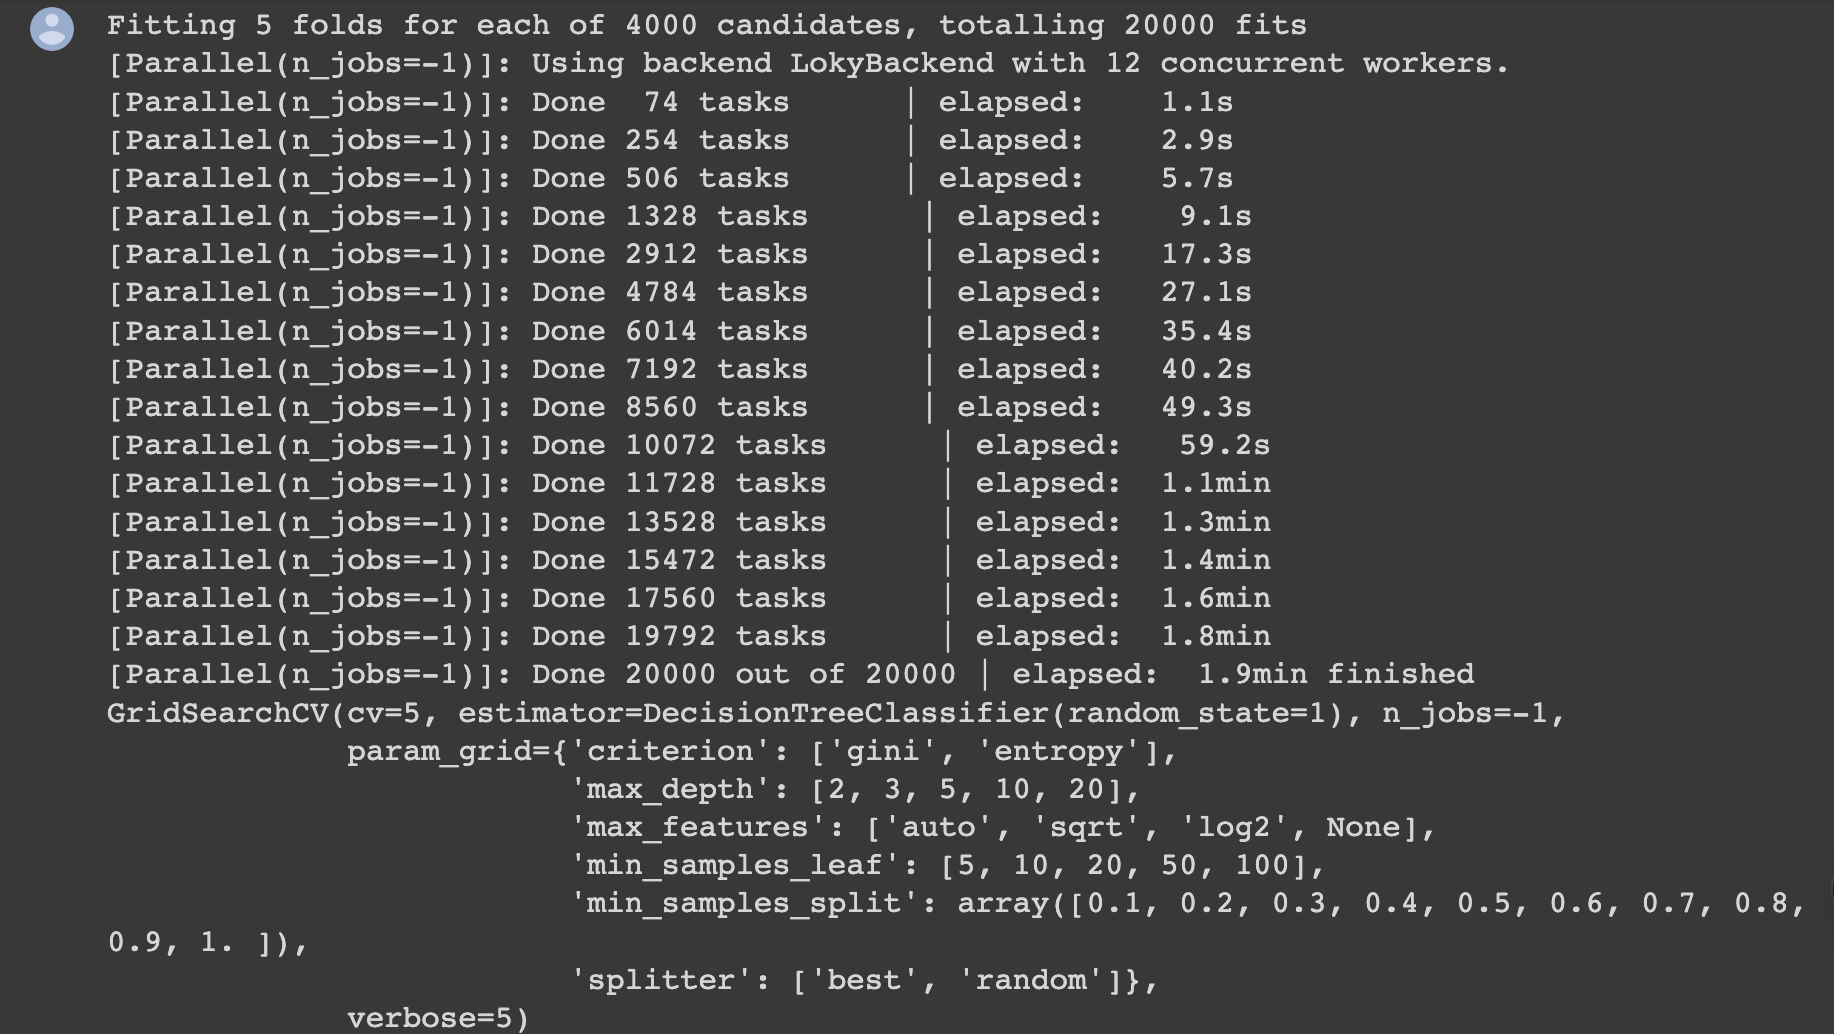

Now that this is fit, we can ask for the best parameters as follows:

In [ ]:
################ DONT RUN THIS CELL ############################################
################ IT WILL TAKE VERY LONG TIME ON A NORMAL PC ####################
################ RESULTS SHOWS ARE FROM A CPU WITH 12 PROCESSING CORE ##########
dtree_grid_search.best_params_

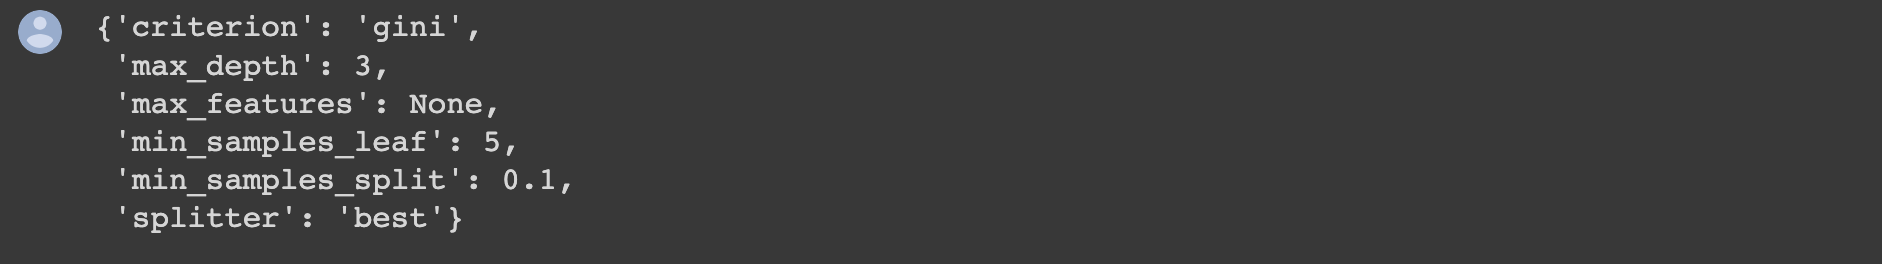

In [ ]:
################ DONT RUN THIS CELL ############################################
################ IT WILL TAKE VERY LONG TIME ON A NORMAL PC ####################
################ RESULTS SHOWS ARE FROM A CPU WITH 12 PROCESSING CORE ##########

# Summarize
print('Mean Accuracy: %.3f' % dtree_grid_search.best_score_)
print('Config: %s' % dtree_grid_search.best_params_)

Mean Accuracy: 0.881
Config: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 0.1, 'splitter': 'best'}


The grid search provides many more options, including the ability to specify a custom scoring function, to parallelize the computations, to do randomized searches, and more.

#### RandomizedSearchCV

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

Let us explore the available parameters of the RandomizedSearchCV we can play with
[Scikit Learn Official link ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV)

**Over here we will inspect:**
- Parameters (What we will specify)
- Attributes (That an estimator will learn or keep a log about other key details)
- Some most common methods

In [ ]:
# Using Random Search with CV

estimators = DecisionTreeClassifier()
dtree_grid = {
    "splitter": ["best", "random"],
    "min_samples_split": np.linspace(0.1, 1.0, 10, endpoint=True),
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    "max_features": ["auto", "sqrt", "log2", None]
}

# Run RandomizedSearchCV
dtree_randomized_search = RandomizedSearchCV(estimators, param_distributions=dtree_grid, n_iter=70, refit = True, verbose = 5, cv=5, n_jobs = -1, random_state=1)

In [ ]:
################ DONT RUN THIS CELL ############################################
################ IT WILL TAKE VERY LONG TIME ON A NORMAL PC ####################
################ RESULTS SHOWS ARE FROM A CPU WITH 12 PROCESSING CORE ##########


# Fitting the model for randomized grid search
dtree_randomized_search.fit(X_train , y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    1.9s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=70,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'splitter': ['best', 'random']},
                   random_state=1, verbose=5)

Now that this is fit, we can ask for the best parameters as follows:

In [ ]:
################ DONT RUN THIS CELL ############################################
################ IT WILL TAKE VERY LONG TIME ON A NORMAL PC ####################
################ RESULTS SHOWS ARE FROM A CPU WITH 12 PROCESSING CORE ##########

dtree_randomized_search.best_params_

{'splitter': 'best',
 'min_samples_split': 0.1,
 'min_samples_leaf': 5,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'entropy'}

In [ ]:
################ DONT RUN THIS CELL ############################################
################ IT WILL TAKE VERY LONG TIME ON A NORMAL PC ####################
################ RESULTS SHOWS ARE FROM A CPU WITH 12 PROCESSING CORE ##########

# Summarize
print('Mean Accuracy: %.3f' % dtree_randomized_search.best_score_)
print('Config: %s' % dtree_randomized_search.best_params_)

Mean Accuracy: 0.880
Config: {'splitter': 'best', 'min_samples_split': 0.1, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}


### Some more theory about Dtree

**Advantages and disadvantages**

**Advantages** - CART is easy to interpret and can adapt to learn complex
relationships. It requires little data preparation, and data typically does not need to be scaled. Feature importance is built in due to the way decision nodes are built. It performs well on large datasets. It works for both regression and classification problems.

**Disadvantages** - CART is prone to overfitting unless pruning is used. It can
be very nonrobust, meaning that small changes in the training dataset can lead to quite major differences in the hypothesis function that gets learned. CART generally has worse performance than ensemble models, which are covered next.

**Model Interpretation: White Box Versus Black Box**

- As you can see Decision Trees are fairly intuitive and their decisions are easy to interpret.
- Such models are often called white box models. In contrast, as we will see, Random Forests or neural networks are generally considered black box models.
- They make great predictions, and you can easily check the calculations that they performed to make these predictions; nevertheless, it is usually hard to explain in simple terms why the predictions were made.
- For example, if a neural network says that a particular person appears on a picture, it is hard to know what actually contributed to this prediction: did the model recognize that person’s eyes? Her mouth? Her nose? Her shoes? Or even the couch that she was sitting on?
- Conversely, Decision Trees provide nice and simple classification rules that can even be applied manually if need be (e.g., for flower classification).

# Ensembles of estimators

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

- This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called *bagging*.

- Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits or undefit the data, and averages the results to find a better classification.

- An ensemble of randomized decision trees is known as a *random forest*.

- This type of bagging classification can be done manually using Scikit-Learn's ``BaggingClassifier`` meta-estimator as well.

- We will first see `BaggingClassifiers` then `RandomForest`

### Bagging & Pasting Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

- One way to get a diverse set of classifiers is to use very different training algorithms
- Another approach is to use the same training algorithm for every
predictor, but to train them on different random subsets of the training set.
- When sampling is performed with replacement, this method is called bagging (short for bootstrap aggregating).
- When sampling is performed without replacement, it is called pasting

In [ ]:
# Bagging using Simple Dtree
# (This is an example of bagging, but if you want to use pasting instead, just set bootstrap=False).

# Set model to be used in bagging
model = DecisionTreeClassifier() # Not tuned, let's check if we can get close to tuned Dtree performance with Bagging

# Initialize bagging calssifier with previously choosen model
bag = BaggingClassifier(model, n_estimators=10, max_samples=0.8, random_state=1, n_jobs=-1, verbose=5, oob_score=True)
bag.fit(X_train, y_train)
predictions = bag.predict(X_test)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.7s finished
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


In [ ]:
# OOB Score (Out of bag instance evaluation).
# According to this oob evaluation, this BaggingClassifier is likely to achieve the given accuracy on the test set
# If oob_score=True we can remove cross validation
bag.oob_score_

0.8540862855138548

In [ ]:
# Make sure you pass the values in same order. First ytest (Orginal values) and then y_model (Model which will predict the y values)
accuracy_score(y_test, predictions)
classification_results = classification_results.append({'classifier_Name': 'Bagging Dtree', 'Accuracy_Score': round(accuracy_score(y_test, predictions), 4)*100}, ignore_index=True)
classification_results

<ipython-input-118-066f56017b5a>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_results = classification_results.append({'classifier_Name': 'Bagging Dtree', 'Accuracy_Score': round(accuracy_score(y_test, predictions), 4)*100}, ignore_index=True)


,classifier_Name,Accuracy_Score
0,Dtree,0.837393
1,CV DTree,84.090000
2,Bagging Dtree,86.320000


Text(168.97222222222223, 0.5, 'Predicted Label')

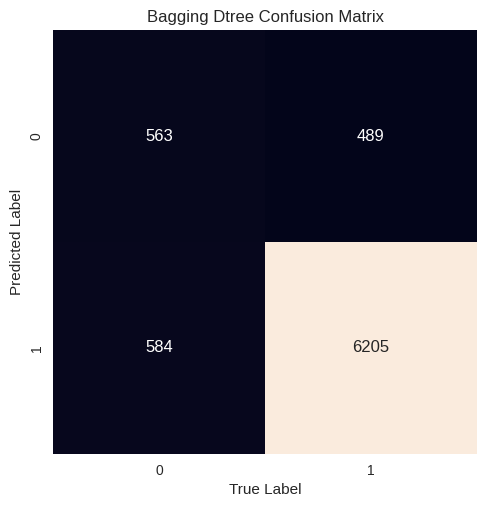

In [ ]:
# Plot Confusion Matrix
# Format is -> confusion_matrix(Actual, Predicted)
c_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(c_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Bagging Dtree Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

### Task 3

In [ ]:
# Task 3

# Use RandomForestClassifier
# 1. Train it
# 2. Get accuracy score
# 3. Get Confusion Matrix

### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
# Bagging using Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1, verbose=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.7s


building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100building tree 28 of 100

building tree 29 of 100
building tree 30 of 100
building tree 31 of 100building tree 32 of 100

building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59

[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    3.1s


building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100building tree 100 of 100



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
# Make sure you pass the values in same order. First ytest (Orginal values) and predections
accuracy_score(y_test, predictions)
classification_results = classification_results.append({'classifier_Name': 'Random Forest', 'Accuracy_Score': round(accuracy_score(y_test, predictions), 4)*100}, ignore_index=True)
classification_results

<ipython-input-122-e4d339937edc>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_results = classification_results.append({'classifier_Name': 'Random Forest', 'Accuracy_Score': round(accuracy_score(y_test, predictions), 4)*100}, ignore_index=True)


,classifier_Name,Accuracy_Score
0,Dtree,0.837393
1,CV DTree,84.090000
2,Bagging Dtree,86.320000
3,Random Forest,88.270000


Text(168.97222222222223, 0.5, 'Predicted Label')

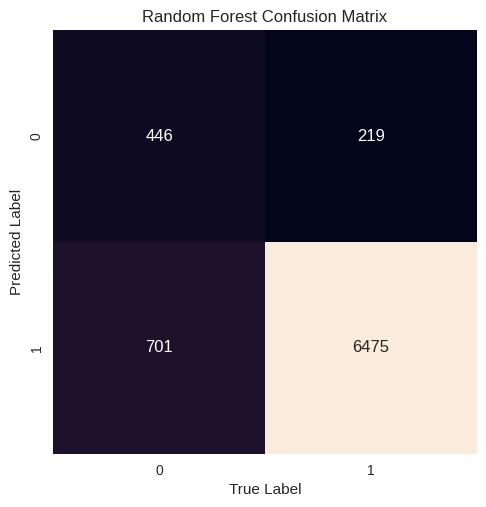

In [ ]:
# Plot Confusion Matrix
# Format is -> confusion_matrix(Actual, Predicted)
c_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(c_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

### Extra Tree

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier

- When you are growing a tree in a Random Forest, at each node only a random subset of the features is considered for splitting. It is possible to make
trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds (like regular Decision Trees do)
- A forest of such extremely random trees is simply called an Extremely Randomized Trees ensemble1 (or Extra-Trees for short).

In [ ]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
# Make sure you pass the values in same order. First ytest (Orginal values) and then predictions
accuracy_score(y_test, predictions)
classification_results = classification_results.append({'classifier_Name': 'Extra Tree Classifier', 'Accuracy_Score': round(accuracy_score(y_test, predictions), 4)*100}, ignore_index=True)
classification_results

<ipython-input-125-f62670e83d6e>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_results = classification_results.append({'classifier_Name': 'Extra Tree Classifier', 'Accuracy_Score': round(accuracy_score(y_test, predictions), 4)*100}, ignore_index=True)


,classifier_Name,Accuracy_Score
0,Dtree,0.837393
1,CV DTree,84.090000
2,Bagging Dtree,86.320000
3,Random Forest,88.270000
4,Extra Tree Classifier,87.460000


Text(168.97222222222223, 0.5, 'Predicted Label')

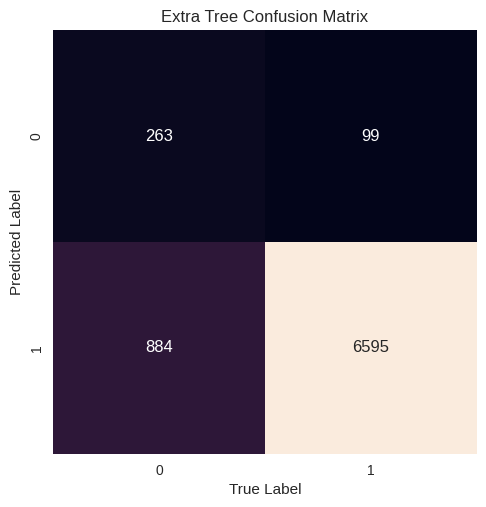

In [ ]:
# Plot Confusion Matrix
# Format is -> confusion_matrix(Actual, Predicted)
c_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(c_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Extra Tree Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

### AdaBoost

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

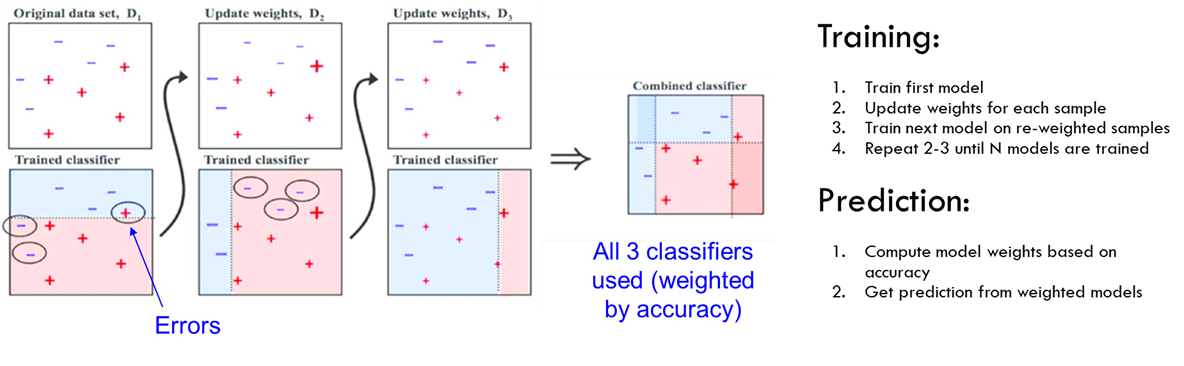

In [ ]:
# AdaBoostClassifier

model = AdaBoostClassifier()
# Default-> AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, algorithm="SAMME.R", learning_rate=0.1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
# Make sure you pass the values in same order. First ytest (Orginal values) and then y_model (Model which will predict the y values)
accuracy_score(y_test, predictions)
classification_results = classification_results.append({'classifier_Name': 'Ada Boost Classifier', 'Accuracy_Score': round(accuracy_score(y_test, predictions), 4)*100}, ignore_index=True)
classification_results

<ipython-input-128-0386af795854>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_results = classification_results.append({'classifier_Name': 'Ada Boost Classifier', 'Accuracy_Score': round(accuracy_score(y_test, predictions), 4)*100}, ignore_index=True)


,classifier_Name,Accuracy_Score
0,Dtree,0.837393
1,CV DTree,84.090000
2,Bagging Dtree,86.320000
3,Random Forest,88.270000
4,Extra Tree Classifier,87.460000
5,Ada Boost Classifier,88.390000


Text(168.97222222222223, 0.5, 'Predicted Label')

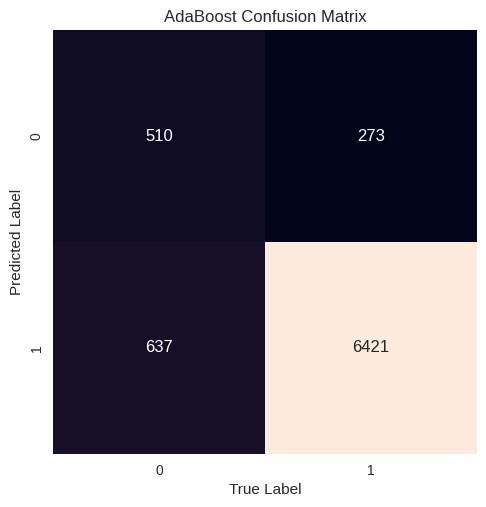

In [ ]:
# Plot Confusion Matrix
# Format is -> confusion_matrix(Actual, Predicted)
c_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(c_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

### Gradient Boosting

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
# Make sure you pass the values in same order. First ytest (Orginal values) and then predictions
accuracy_score(y_test, predictions)
classification_results = classification_results.append({'classifier_Name': 'Gradient Boost Classifier', 'Accuracy_Score': round(accuracy_score(y_test, predictions), 4)*100}, ignore_index=True)
classification_results

<ipython-input-131-0def8d7f65ab>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_results = classification_results.append({'classifier_Name': 'Gradient Boost Classifier', 'Accuracy_Score': round(accuracy_score(y_test, predictions), 4)*100}, ignore_index=True)


,classifier_Name,Accuracy_Score
0,Dtree,0.837393
1,CV DTree,84.090000
2,Bagging Dtree,86.320000
3,Random Forest,88.270000
4,Extra Tree Classifier,87.460000
5,Ada Boost Classifier,88.390000
6,Gradient Boost Classifier,88.230000


Text(168.97222222222223, 0.5, 'Predicted Label')

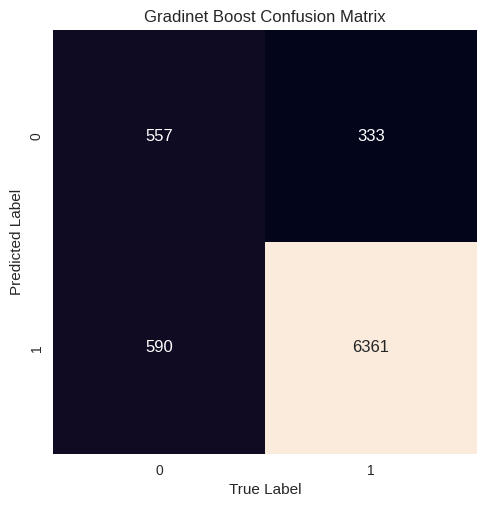

In [ ]:
# Plot Confusion Matrix
# Format is -> confusion_matrix(Actual, Predicted)
c_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(c_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Gradinet Boost Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

### XGBoost

https://xgboost.readthedocs.io/en/latest/tutorials/model.html

- Optimized implementation of Gradient Boosting is known as XGBoost, which stands for Extreme Gradient Boosting.
- It aims at being extremely fast, scalable
and portable

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
# Make sure you pass the values in same order. First ytest (Orginal values) and then y_model (Model which will predict the y values)
accuracy_score(y_test, predictions)
classification_results = classification_results.append({'classifier_Name': 'XGBoost Classifier', 'Accuracy_Score': round(accuracy_score(y_test, predictions), 4)*100}, ignore_index=True)
classification_results

<ipython-input-134-64e5de57a8c5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_results = classification_results.append({'classifier_Name': 'XGBoost Classifier', 'Accuracy_Score': round(accuracy_score(y_test, predictions), 4)*100}, ignore_index=True)


,classifier_Name,Accuracy_Score
0,Dtree,0.837393
1,CV DTree,84.090000
2,Bagging Dtree,86.320000
3,Random Forest,88.270000
4,Extra Tree Classifier,87.460000
5,Ada Boost Classifier,88.390000
6,Gradient Boost Classifier,88.230000
7,XGBoost Classifier,88.020000


Text(168.97222222222223, 0.5, 'Predicted Label')

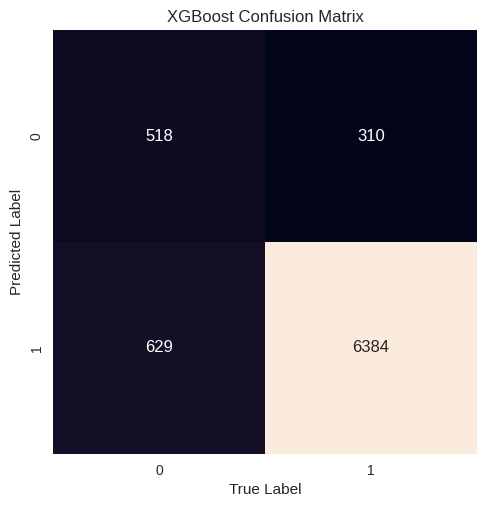

In [ ]:
# Plot Confusion Matrix
# Format is -> confusion_matrix(Actual, Predicted)
c_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(c_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

### LightGBM

https://www.youtube.com/watch?v=9uxWzeLglr0

https://lightgbm.readthedocs.io/


- LightGBM, short for Light Gradient Boosted Machine, is a library developed at Microsoft that provides an efficient implementation of the gradient boosting algorithm.

- The primary benefit of the LightGBM is the changes to the training algorithm that make the process dramatically faster, and in many cases, result in a more effective model.

- For more technical details on the LightGBM algorithm, see the paper:
[LightGBM: A Highly Efficient Gradient Boosting Decision Tree, 2017.](https://papers.nips.cc/paper/6907-lightgbm-a-highly-efficient-gradient-boosting-decision-tree)

In [ ]:
model = LGBMClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
# Make sure you pass the values in same order. First ytest (Orginal values) and then y_model (Model which will predict the y values)
accuracy_score(y_test, predictions)
classification_results = classification_results.append({'classifier_Name': 'lightgbm Classifier', 'Accuracy_Score': round(accuracy_score(y_test, predictions), 4)* 100}, ignore_index=True)
classification_results

<ipython-input-137-25111f02a18c>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_results = classification_results.append({'classifier_Name': 'lightgbm Classifier', 'Accuracy_Score': round(accuracy_score(y_test, predictions), 4)* 100}, ignore_index=True)


,classifier_Name,Accuracy_Score
0,Dtree,0.837393
1,CV DTree,84.090000
2,Bagging Dtree,86.320000
3,Random Forest,88.270000
4,Extra Tree Classifier,87.460000
5,Ada Boost Classifier,88.390000
6,Gradient Boost Classifier,88.230000
7,XGBoost Classifier,88.020000
8,lightgbm Classifier,88.460000


Text(168.97222222222223, 0.5, 'Predicted Label')

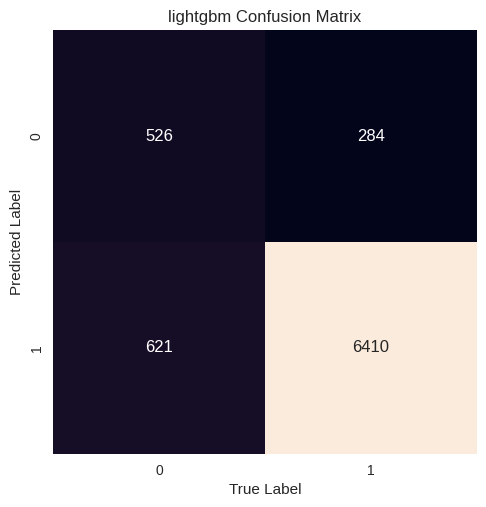

In [ ]:
# Plot Confusion Matrix
# Format is -> confusion_matrix(Actual, Predicted)
c_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(c_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('lightgbm Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# What else we can do ??

1. Feature engineering (Feature addition {Domain Driven or other ways like polynomial features}, feature reduction. feature preparation {More important for estimators where underlying distribution is important})
2. We can move to more complex ANN based models
3. Rest, God is great :-)

# Assignment

Using the same data, choose three hyperparameters and in each hyperparameters choose 2 values:
1. Tune XGBoost for better performamce
3. Tune LightGBM model for better performamce


# Then

1. Show their Accuracy
2. Confusion Matrix


# Then

Upload your final code as ipynb file onto Canvas with the name "AMLFin_Day1_YourName.ipynb"